In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
keys_ordered = ["ATSP/br17.atsp", "ATSP/ftv33.atsp", "ATSP/ftv38.atsp", "ATSP/ry48p.atsp", "ATSP/ft53.atsp", "ATSP/ftv55.atsp", "ATSP/ft70.atsp", "ATSP/kro124p.atsp"]
f = open("../in_fin.txt", "r")
text = f.read()

optimas = {}
optimas[keys_ordered[0]] = 39
optimas[keys_ordered[1]] = 1286
optimas[keys_ordered[2]] = 1530
optimas[keys_ordered[3]] = 14422
optimas[keys_ordered[4]] = 6905
optimas[keys_ordered[5]] = 1608
optimas[keys_ordered[6]] = 38673
optimas[keys_ordered[7]] = 36230

In [27]:
cases = {}
casename = ""
algorithm = ""
for line in text.split("\n"):
    if line[:7] == "Problem":
        casename = line[8:-1]
        cases[casename] = {}
        continue
    if len(line.split()) > 1 and line.split()[1] == "runs":
        algorithm = line.split()[0]
        cases[casename][algorithm] = {"init": [], "final": []}
    
    elements = line.split()

    if len(elements) == 2:
        cases[casename][algorithm]["init"].append(int(elements[0]))
        cases[casename][algorithm]["final"].append(int(elements[1]))

cases = {i: cases[i] for i in keys_ordered if i in cases.keys()}

In [28]:
print(cases)

{'ATSP/ftv33.atsp': {'G': {'init': [4577, 4627, 4529, 4481, 3992, 4206, 4396, 4970, 4742, 4338, 4431, 4842, 4516, 4515, 4135, 4739, 4487, 4307, 4282, 4580, 4317, 3835, 4400, 4166, 4349, 4240, 4452, 4345, 4424, 4197, 4662, 4013, 4464, 4068, 4677, 4458, 4570, 4048, 4362, 4357, 4549, 3995, 4503, 4534, 4022, 4422, 4336, 4304, 4674, 4197], 'final': [1792, 1484, 1962, 1608, 1749, 1927, 1565, 1617, 1699, 1864, 1567, 1498, 1751, 1972, 1929, 1865, 1960, 1718, 1959, 2080, 1974, 1841, 1713, 1888, 1847, 1737, 1749, 1789, 1585, 2187, 1700, 1878, 1540, 1716, 1791, 1927, 2043, 1860, 2079, 1811, 1971, 1788, 1956, 1631, 2092, 1697, 1541, 1647, 1781, 1976]}, 'S': {'init': [4266, 3849, 4466, 4271, 4369, 4414, 4683, 4665, 4228, 4234, 4216, 4726, 4859, 4146, 4525, 4540, 4155, 4280, 4623, 4210, 4593, 5016, 4289, 4499, 4301, 4133, 4967, 4100, 4376, 4131, 4595, 4370, 4863, 4649, 4368, 4247, 4496, 4670, 4477, 5006, 4290, 4658, 4061, 4444, 4370, 4309, 4281, 4694, 4222, 4129], 'final': [1837, 2202, 1884, 2273, 2

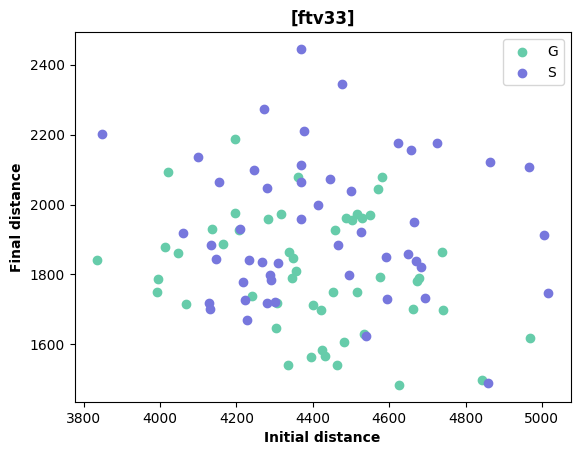

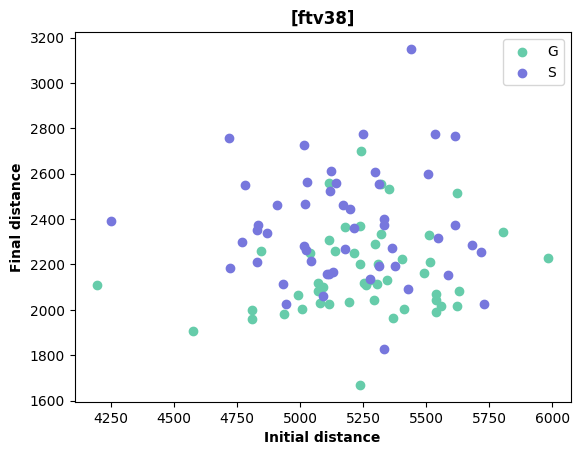

In [29]:
ticks = [i[5:-5] for i in list(cases.keys())]

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa55dd"]
for instance in range(2):
    for index, algorithm in enumerate(["G", "S"]):

        key = list(cases.keys())[instance]
        plt.scatter(cases[key][algorithm]["init"], cases[key][algorithm]["final"], color=colors[index], label=algorithm)

    plt.title("[" + ticks[instance] + "]", fontweight='bold')
    plt.xlabel('Initial distance', fontweight='bold')
    plt.ylabel("Final distance", fontweight='bold')
    
    plt.legend()
    plt.savefig('init_fin' + str(instance) +'.pdf')
    plt.show()